Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

-------- Visualizing and analysing the data-------- 

Reading the Dataset

In [2]:
app = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [3]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Univariate analysis

Number of people working status :
OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64


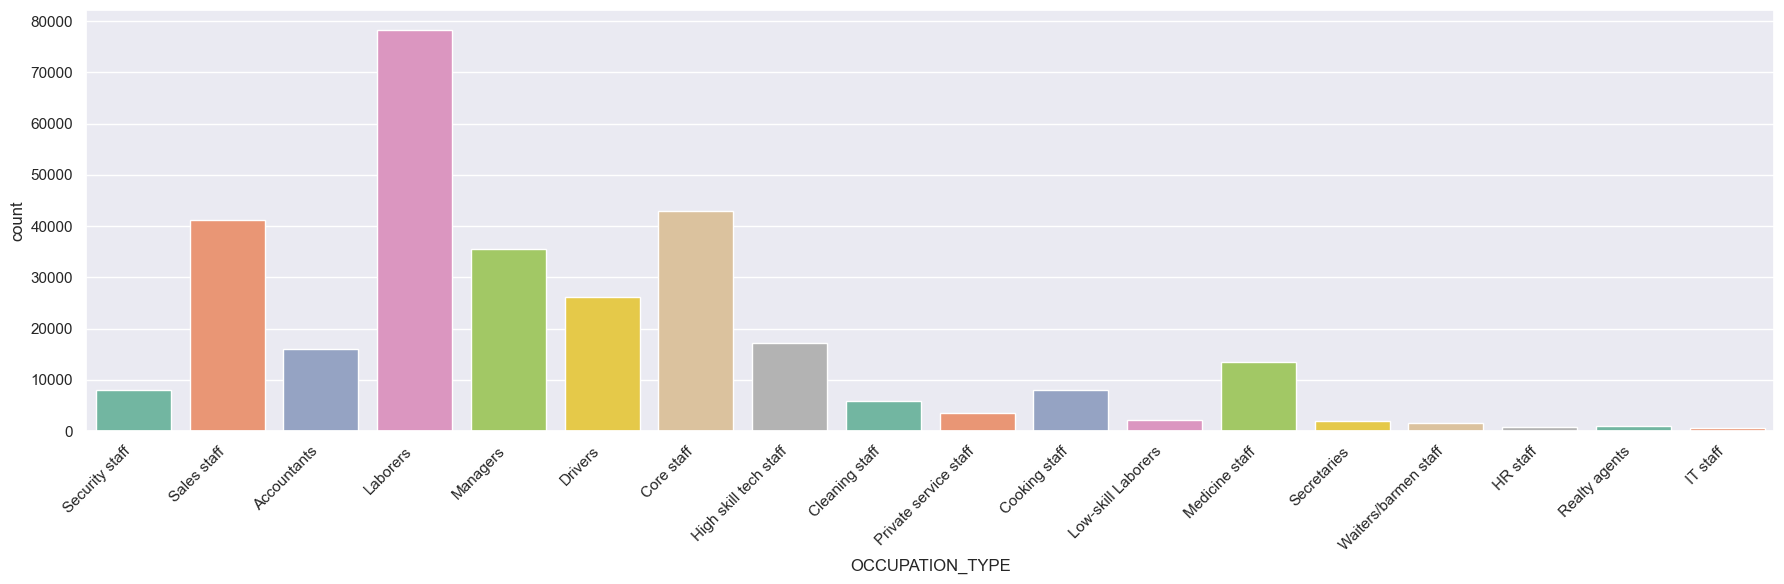

In [4]:
print("Number of people working status :") 
print(app['OCCUPATION_TYPE'].value_counts()) 
sns.set(rc = {'figure.figsize': (18,6)}) 
sns.countplot(x='OCCUPATION_TYPE', hue='OCCUPATION_TYPE', data=app, palette='Set2', legend=False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Types of house of the peoples:
NAME_HOUSING_TYPE
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64


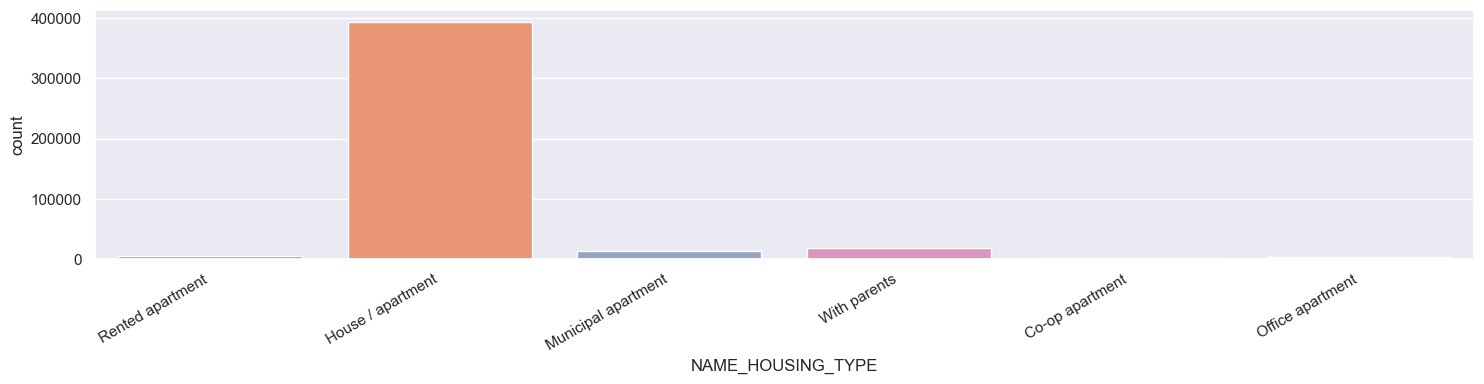

In [5]:
print("Types of house of the peoples:")
print(app['NAME_HOUSING_TYPE'].value_counts())

sns.set(rc={'figure.figsize': (15, 4)})
sns.countplot(x='NAME_HOUSING_TYPE', hue='NAME_HOUSING_TYPE', data=app, palette='Set2', legend=False)

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Income Types Of the Person :
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64


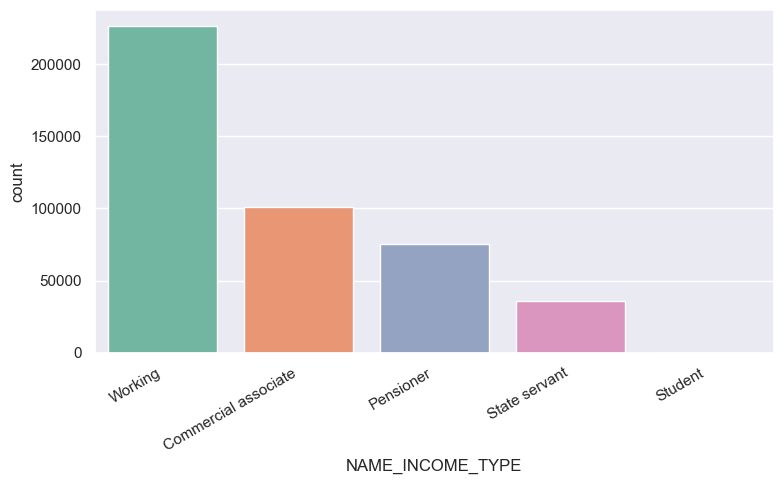

In [6]:
print("Income Types Of the Person :")
print(app['NAME_INCOME_TYPE'].value_counts())

sns.set(rc={'figure.figsize': (8, 5)})
sns.countplot(x='NAME_INCOME_TYPE', hue='NAME_INCOME_TYPE', data=app, palette='Set2', legend=False)

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Multivariate analysis

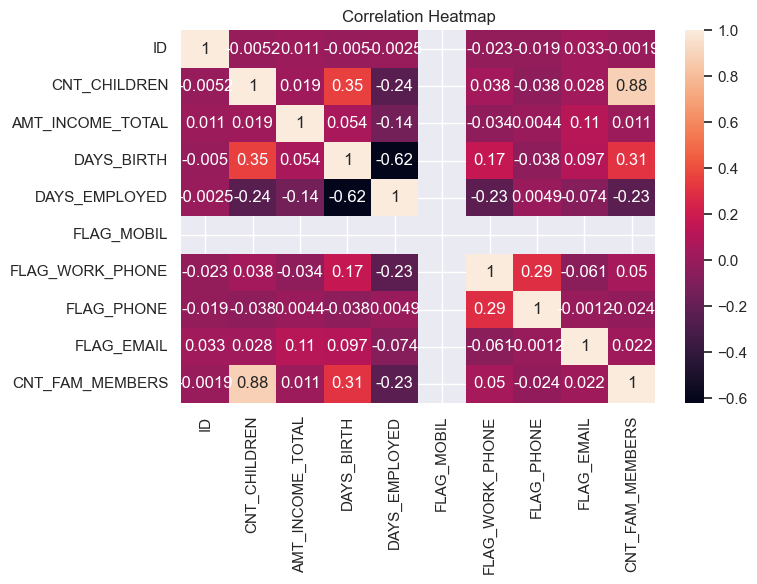

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
numeric_data = app.select_dtypes(include=['number'])  # Only numeric data
sns.heatmap(numeric_data.corr(), annot=True, ax=ax)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Descriptive Analysis

In [8]:
app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [9]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
def explore_unique_values(df, columns):
    for col in columns:
        print(f"\nColumn: {col}")
        print("-" * 40)
        print(df[col].value_counts(dropna=False))

columns_to_explore = [
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'CNT_FAM_MEMBERS'
]

explore_unique_values(app, columns_to_explore)


Column: CODE_GENDER
----------------------------------------
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64

Column: FLAG_OWN_CAR
----------------------------------------
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64

Column: FLAG_OWN_REALTY
----------------------------------------
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64

Column: CNT_CHILDREN
----------------------------------------
CNT_CHILDREN
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: count, dtype: int64

Column: NAME_INCOME_TYPE
----------------------------------------
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64

Column: NAME_EDUCATION_TYPE
----------------------------------------
NAME_EDUCATION_TYPE
Secon

-------- Data Pre-processing--------

Droping unwanted features

In [11]:
#dropping duplicate rows

app.drop_duplicates(subset=[
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'FLAG_MOBIL',
    'FLAG_WORK_PHONE',
    'FLAG_PHONE',
    'FLAG_EMAIL',  
    'OCCUPATION_TYPE',
    'CNT_FAM_MEMBERS'
], keep='first', inplace=True)

Handling Missing Values

In [12]:
app.isnull().mean()

ID                     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        0.305012
CNT_FAM_MEMBERS        0.000000
dtype: float64

Data Cleaning and Merging

In [13]:
def data_cleansing(data):

    # Combining family members and children
    data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'] + data['CNT_CHILDREN']

    # Drop irrelevant or redundant columns
    dropped_cols = [
        'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
        'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_CHILDREN'
    ]
    data = data.drop(dropped_cols, axis=1)

    # Converting days into years
    data['DAYS_BIRTH'] = np.abs(data['DAYS_BIRTH']) / 365
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'] / 365

    # Simplifying categorical values
    housing_type = {
        'House / apartment': 'House / apartment',
        'With parents': 'With parents',
        'Municipal apartment': 'House / apartment',
        'Rented apartment': 'House / apartment',
        'Office apartment': 'House / apartment',
        'Co-op apartment': 'House / apartment'
    }

    income_type = {
        'Commercial associate': 'Working',
        'State servant': 'Working',
        'Working': 'Working',
        'Pensioner': 'Pensioner',
        'Student': 'Student'
    }

    education_type = {
        'Secondary / secondary special': 'secondary',
        'Lower secondary': 'secondary',
        'Higher education': 'Higher education',
        'Incomplete higher': 'Higher education',
        'Academic degree': 'Academic degree'
    }

    family_status = {
        'Single / not married': 'Single',
        'Separated': 'Single',
        'Widow': 'Single',
        'Civil marriage': 'Married',
        'Married': 'Married'
    }

    data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing_type)
    data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income_type)
    data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].map(education_type)
    data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].map(family_status)

    return data

In [14]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [15]:
credit.shape

(1048575, 3)

In [16]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [17]:
# Analyzing credit history timeline and repayment behavior

# Grouping by customer ID
grouped = credit.groupby('ID')

# Creating pivot table with ID as index and MONTHS_BALANCE as columns
pivot_tb = credit.pivot(index='ID', columns='MONTHS_BALANCE', values='STATUS')

# Calculating the first and last observed month per ID
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()

# Calculating total number of months observed
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] + 1

# Counting occurrences of each credit status code
pivot_tb['paid_off'] = (pivot_tb.iloc[:, 0:61] == 'C').sum(axis=1)
pivot_tb['pastdue_1-29'] = (pivot_tb.iloc[:, 0:61] == '0').sum(axis=1)
pivot_tb['pastdue_30-59'] = (pivot_tb.iloc[:, 0:61] == '1').sum(axis=1)
pivot_tb['pastdue_60-89'] = (pivot_tb.iloc[:, 0:61] == '2').sum(axis=1)
pivot_tb['pastdue_90-119'] = (pivot_tb.iloc[:, 0:61] == '3').sum(axis=1)
pivot_tb['pastdue_120-149'] = (pivot_tb.iloc[:, 0:61] == '4').sum(axis=1)
pivot_tb['pastdue_over_150'] = (pivot_tb.iloc[:, 0:61] == '5').sum(axis=1)
pivot_tb['no_loan'] = (pivot_tb.iloc[:, 0:61] == 'X').sum(axis=1)

# Resetting ID to make merging with app data easier
pivot_tb['ID'] = pivot_tb.index

status_meanings = {
    'paid_off': 'Loan paid on time',
    'pastdue_1-29': 'Due less than 1 month',
    'pastdue_30-59': 'Due greater than 1 month',
    'pastdue_60-89': 'Due greater than 2 months',
    'pastdue_90-119': 'Due greater than 3 months',
    'pastdue_120-149': 'Due greater than 4 months',
    'pastdue_over_150': 'Due greater than 5 months',
    'no_loan': 'No loan recorded for that month'
}

for key, meaning in status_meanings.items():
    print(f"{key} ➜ {meaning}")

paid_off ➜ Loan paid on time
pastdue_1-29 ➜ Due less than 1 month
pastdue_30-59 ➜ Due greater than 1 month
pastdue_60-89 ➜ Due greater than 2 months
pastdue_90-119 ➜ Due greater than 3 months
pastdue_120-149 ➜ Due greater than 4 months
pastdue_over_150 ➜ Due greater than 5 months
no_loan ➜ No loan recorded for that month


In [18]:
pivot_tb.head(10)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,window,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,9,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,60,0,0,0,0,0,0,0,60,5001715
5001717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,5,17,0,0,0,0,0,0,5001717
5001718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39,3,24,2,0,0,0,0,10,5001718
5001719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,41,2,0,0,0,0,0,0,5001719
5001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36,0,29,7,0,0,0,0,0,5001720


Feature Engineering

In [19]:
def feature_engineering_target(data):
    good_or_bad = []

    for _, row in data.iterrows():
        paid_off = row['paid_off']
        over_1 = row['pastdue_1-29']
        over_30 = row['pastdue_30-59']
        over_60 = row['pastdue_60-89']
        over_90 = row['pastdue_90-119']
        over_120 = row['pastdue_120-149'] + row['pastdue_over_150']
        no_loan = row['no_loan']

        total_pastdues = over_1 + over_30 + over_60 + over_90 + over_120

        # CASE 1: Perfect record (no dues and had at least one loan)
        if total_pastdues == 0 and paid_off > 0:
            good_or_bad.append(1)

        # CASE 2: Severe delay - disqualify
        elif over_90 > 0 or over_120 > 0:
            good_or_bad.append(0)

        # CASE 3: Some dues but more paid than overdue
        elif total_pastdues > 0 and paid_off > total_pastdues:
            good_or_bad.append(1)

        # CASE 4: No loans ever — uncertain, default to rejected
        elif paid_off == 0 and no_loan > 0:
            good_or_bad.append(0)

        # CASE 5: Otherwise bad
        else:
            good_or_bad.append(0)

    return good_or_bad


In [20]:
# Creating the target DataFrame from pivoted credit data
target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values

# Sum all overdue categories to get total number of past due instances
target['#_of_pastdues'] = (
    pivot_tb['pastdue_1-29'].values +
    pivot_tb['pastdue_30-59'].values +
    pivot_tb['pastdue_60-89'].values +
    pivot_tb['pastdue_90-119'].values +
    pivot_tb['pastdue_120-149'].values +
    pivot_tb['pastdue_over_150'].values
)

target['no_loan'] = pivot_tb['no_loan'].values

# Creating custom target variable using your function
target['target'] = feature_engineering_target(pivot_tb)

# Merging with cleansed_app data on ID and drop ID afterwards
cleansed_app = data_cleansing(app)
credit_app = cleansed_app.merge(target, how='inner', on='ID')
credit_app.drop('ID', axis=1, inplace=True)

# Displaying the final merged dataset
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
0,M,Y,Y,427500.0,Working,Higher education,Married,House / apartment,32.890411,-12.443836,2.0,13,2,1,1
1,M,Y,Y,112500.0,Working,secondary,Married,House / apartment,58.832877,-3.106849,2.0,7,7,16,0
2,F,N,Y,270000.0,Working,secondary,Single,House / apartment,52.356164,-8.358904,1.0,0,2,3,0
3,F,N,Y,283500.0,Pensioner,Higher education,Single,House / apartment,61.545205,1000.665753,1.0,0,14,3,0
4,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46.224658,-2.106849,2.0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,F,N,N,180000.0,Pensioner,secondary,Married,House / apartment,56.438356,-0.542466,2.0,0,21,0,0
9705,F,N,Y,112500.0,Working,secondary,Married,House / apartment,43.389041,-7.380822,2.0,8,12,0,0
9706,M,Y,Y,90000.0,Working,secondary,Married,House / apartment,52.331507,-4.715068,2.0,0,17,5,0
9707,F,N,Y,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,-3.630137,2.0,14,19,0,0


Handling Categorical Values

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initializing individual encoders
cg = LabelEncoder()
oc = LabelEncoder()
own_r = LabelEncoder()
it = LabelEncoder()
et = LabelEncoder()
fs = LabelEncoder()
ht = LabelEncoder()

# Applying label encoding to selected categorical columns
credit_app['CODE_GENDER'] = cg.fit_transform(credit_app['CODE_GENDER'])
credit_app['FLAG_OWN_CAR'] = oc.fit_transform(credit_app['FLAG_OWN_CAR'])
credit_app['FLAG_OWN_REALTY'] = own_r.fit_transform(credit_app['FLAG_OWN_REALTY'])
credit_app['NAME_INCOME_TYPE'] = it.fit_transform(credit_app['NAME_INCOME_TYPE'])
credit_app['NAME_EDUCATION_TYPE'] = et.fit_transform(credit_app['NAME_EDUCATION_TYPE'])
credit_app['NAME_FAMILY_STATUS'] = fs.fit_transform(credit_app['NAME_FAMILY_STATUS'])
credit_app['NAME_HOUSING_TYPE'] = ht.fit_transform(credit_app['NAME_HOUSING_TYPE'])

In [22]:
# Gender
print("CODE_GENDER:", credit_app['CODE_GENDER'].unique())
print(cg.inverse_transform(list(credit_app['CODE_GENDER'].unique())))
print()

# Owns a Car
print("FLAG_OWN_CAR:", credit_app['FLAG_OWN_CAR'].unique())
print(oc.inverse_transform(list(credit_app['FLAG_OWN_CAR'].unique())))
print()

# Owns Realty
print("FLAG_OWN_REALTY:", credit_app['FLAG_OWN_REALTY'].unique())
print(own_r.inverse_transform(list(credit_app['FLAG_OWN_REALTY'].unique())))
print()

# Income Type
print("NAME_INCOME_TYPE:", credit_app['NAME_INCOME_TYPE'].unique())
print(it.inverse_transform(list(credit_app['NAME_INCOME_TYPE'].unique())))
print()

# Education Level
print("NAME_EDUCATION_TYPE:", credit_app['NAME_EDUCATION_TYPE'].unique())
print(et.inverse_transform(list(credit_app['NAME_EDUCATION_TYPE'].unique())))
print()

# Family Status
print("NAME_FAMILY_STATUS:", credit_app['NAME_FAMILY_STATUS'].unique())
print(fs.inverse_transform(list(credit_app['NAME_FAMILY_STATUS'].unique())))
print()

# Housing Type
print("NAME_HOUSING_TYPE:", credit_app['NAME_HOUSING_TYPE'].unique())
print(ht.inverse_transform(list(credit_app['NAME_HOUSING_TYPE'].unique())))

CODE_GENDER: [1 0]
['M' 'F']

FLAG_OWN_CAR: [1 0]
['Y' 'N']

FLAG_OWN_REALTY: [1 0]
['Y' 'N']

NAME_INCOME_TYPE: [2 0 1]
['Working' 'Pensioner' 'Student']

NAME_EDUCATION_TYPE: [1 2 0]
['Higher education' 'secondary' 'Academic degree']

NAME_FAMILY_STATUS: [0 1]
['Married' 'Single']

NAME_HOUSING_TYPE: [0 1]
['House / apartment' 'With parents']


In [23]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
0,1,1,1,427500.0,2,1,0,0,32.890411,-12.443836,2.0,13,2,1,1
1,1,1,1,112500.0,2,2,0,0,58.832877,-3.106849,2.0,7,7,16,0
2,0,0,1,270000.0,2,2,1,0,52.356164,-8.358904,1.0,0,2,3,0
3,0,0,1,283500.0,0,1,1,0,61.545205,1000.665753,1.0,0,14,3,0
4,1,1,1,270000.0,2,1,0,0,46.224658,-2.106849,2.0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,180000.0,0,2,0,0,56.438356,-0.542466,2.0,0,21,0,0
9705,0,0,1,112500.0,2,2,0,0,43.389041,-7.380822,2.0,8,12,0,0
9706,1,1,1,90000.0,2,2,0,0,52.331507,-4.715068,2.0,0,17,5,0
9707,0,0,1,157500.0,0,1,0,0,33.936986,-3.630137,2.0,14,19,0,0


Splitting data into train and test

In [24]:
x = credit_app[credit_app.drop('target', axis = 1).columns]
y = credit_app['target']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8, random_state = 42)

-------- Model Building--------

In [25]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(xtrain, ytrain)

# Spliting the balanced data
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

print("Before Resampling:", y.value_counts())
print("After Resampling:", y_resampled.value_counts())

Before Resampling: target
0    6160
1    3549
Name: count, dtype: int64
After Resampling: target
1    4910
0    4910
Name: count, dtype: int64


Logistic Regression Model

In [26]:
def logistic_reg(xtrain, xtest, ytrain, ytest):
    lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
    
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)                    

    print('*** Logistic Regression ***')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

Random Forest Classifier

In [27]:
def random_forest(xtrain, xtest, ytrain, ytest):
    rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
        
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)   
    
    print('*** RandomForestClassifier ***')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

Xgboost Model

In [28]:
def g_boosting(xtrain, xtest, ytrain, ytest):
    gb = GradientBoostingClassifier(max_depth=8, min_samples_leaf=10, random_state=42)
    
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)

    print('*** GradientBoostingClassifier ***')
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification report:')
    print(classification_report(y_test, y_pred))

Decision tree model

In [29]:
def d_tree(xtrain, xtest, ytrain, ytest):
    dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=42)
    
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)   

    print('*** DecisionTreeClassifier ***')
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification report:')
    print(classification_report(y_test, y_pred))

Comparing the models

In [30]:
def compare_model(x_train, x_test, y_train, y_test):
    logistic_reg(x_train, x_test, y_train, y_test)
    print('-' * 100)
    
    random_forest(x_train, x_test, y_train, y_test)
    print('-' * 100)
    
    g_boosting(x_train, x_test, y_train, y_test)
    print('-' * 100)
    
    d_tree(x_train, x_test, y_train, y_test)

In [31]:
compare_model(x_train, x_test, y_train, y_test)

c:\Users\kanak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*** Logistic Regression ***
Confusion Matrix:
[[994   6]
 [  8 956]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99       964

    accuracy                           0.99      1964
   macro avg       0.99      0.99      0.99      1964
weighted avg       0.99      0.99      0.99      1964

----------------------------------------------------------------------------------------------------
*** RandomForestClassifier ***
Confusion Matrix:
[[974  26]
 [  3 961]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1000
           1       0.97      1.00      0.99       964

    accuracy                           0.99      1964
   macro avg       0.99      0.99      0.99      1964
weighted avg       0.99      0.99      0.99      1964

--------------------------------------------------------

Saving the models

In [32]:
import pickle

# Initializing and train the model
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

# Predicting on test data
ypred = gbc.predict(x_test)

# Saving the trained model to disk
pickle.dump(gbc, open("model.pkl", "wb"))

